In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../")

import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels import tsa
import statsmodels.graphics as sg
import sklearn


import matplotlib.pylab as plt

import seaborn as sns
sns.set_theme()

%matplotlib inline

In [2]:
df = pd.read_csv('../data/ts.csv', index_col=0, parse_dates=True)
df.shape, df.head()

((43, 11),
                   rynek  inflacja_r  inflacja_q  stopa_procentowa  \
 2014-03-31  6193.211456       100.6       100.2            0.0446   
 2014-06-30  6227.984614       100.3       100.0            0.0447   
 2014-09-30  6357.260998        99.7        99.5            0.0443   
 2014-12-31  6438.874574        99.3        99.6            0.0388   
 2015-03-31  6473.616559        98.5        99.5            0.0348   
 
             liczba_kredytow  tempo_wzrostu  ufnosc  duze_zakupy  bezrobocie  \
 2014-03-31          41942.0          104.2   -20.5        -16.3        13.5   
 2014-06-30          45499.0          104.1   -16.8        -15.0        12.0   
 2014-09-30          43653.0          103.3   -16.9        -12.7        11.5   
 2014-12-31          42993.0          103.3   -13.8        -10.7        11.4   
 2015-03-31          42169.0          104.0   -14.9        -11.5        11.5   
 
             spr_detaliczna    pkb  
 2014-03-31           105.5  103.8  
 2014-06-30

In [10]:
df.dtypes

rynek               float64
inflacja_r          float64
inflacja_q          float64
stopa_procentowa    float64
liczba_kredytow     float64
tempo_wzrostu       float64
ufnosc              float64
duze_zakupy         float64
bezrobocie          float64
spr_detaliczna      float64
pkb                 float64
dtype: object

In [3]:
columns = df.columns
columns

Index(['rynek', 'inflacja_r', 'inflacja_q', 'stopa_procentowa',
       'liczba_kredytow', 'tempo_wzrostu', 'ufnosc', 'duze_zakupy',
       'bezrobocie', 'spr_detaliczna', 'pkb'],
      dtype='object')

In [4]:
for col in columns:
    df[col+"_year_ma"] = df[col].rolling(4).mean()

In [5]:
df[[col+"_year_ma" for col in columns]].describe()

,rynek_year_ma,inflacja_r_year_ma,inflacja_q_year_ma,stopa_procentowa_year_ma,liczba_kredytow_year_ma,tempo_wzrostu_year_ma,ufnosc_year_ma,duze_zakupy_year_ma,bezrobocie_year_ma,spr_detaliczna_year_ma,pkb_year_ma
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,8849.846281,103.966250,101.003750,0.046937,48229.768750,107.192500,-11.730625,-7.463750,6.964375,103.988750,103.740000
std,2339.195466,4.935454,1.234462,0.020782,9126.086229,3.324541,14.265703,16.001695,2.055534,3.409912,2.544399
min,6304.332910,99.050000,99.650000,0.024625,23229.000000,103.425000,-40.950000,-37.200000,5.075000,97.075000,97.400000
25%,6824.437714,100.631250,100.337500,0.035994,44427.375000,104.187500,-20.262500,-16.050000,5.431250,102.531250,102.343750
50%,8078.145386,102.137500,100.650000,0.038000,49370.375000,106.587500,-11.687500,-9.000000,6.137500,104.650000,104.037500
75%,10718.527679,105.143750,101.200000,0.046681,54299.250000,110.556250,1.031250,7.650000,7.981250,106.362500,105.412500
max,14421.879532,116.125000,104.200000,0.090225,64114.000000,113.375000,7.650000,16.400000,12.100000,109.875000,109.125000


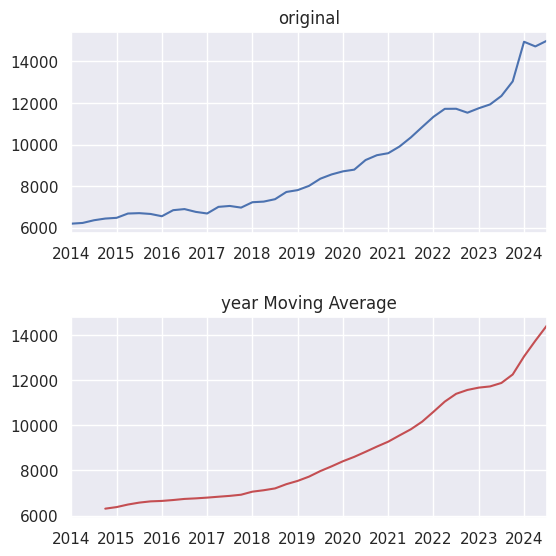

In [8]:

fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(2,1,1)
df['rynek'].plot(ax=ax, color='b')
ax.set_title('original')
ax = fig.add_subplot(2,1,2)
df['rynek_year_ma'].plot(ax=ax, color='r')
ax.set_title('year Moving Average')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.savefig('../images/rynek_ma_year.png', format='png', dpi=300)



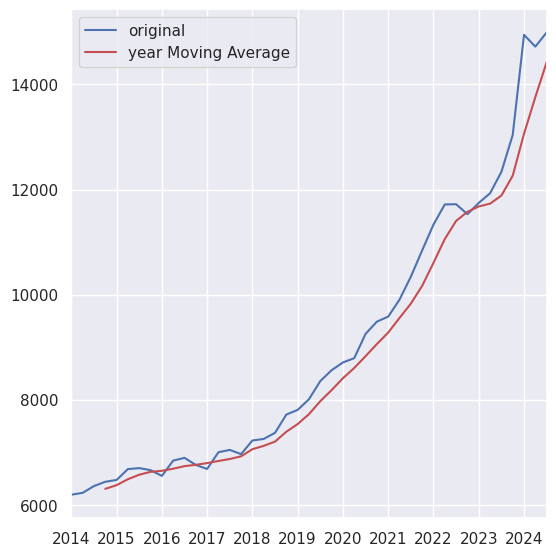

In [9]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.gca()
df['rynek'].plot(ax=ax, color='b', label='original')
df['rynek_year_ma'].plot(ax=ax, color='r', label='year Moving Average')
ax.legend()
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.savefig('../images/rynek_ma_year_2.png', format='png', dpi=300)

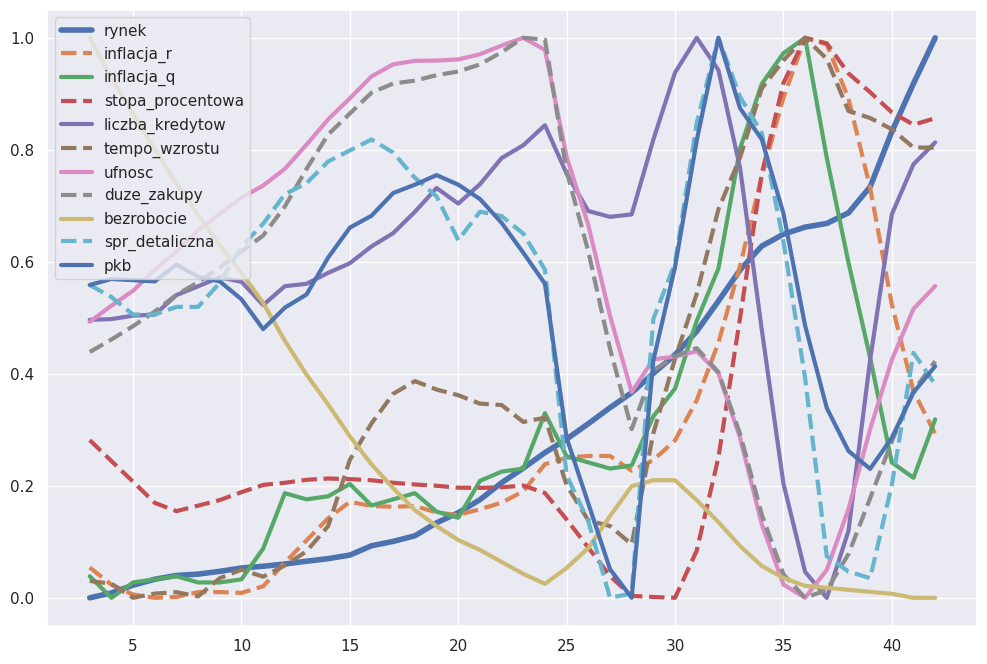

In [12]:
ssdf = sklearn.preprocessing.MinMaxScaler().fit_transform(df[[col+"_year_ma" for col in columns]])
fig = plt.figure(figsize=(12,8))
ax = fig.gca()
for ind, col in enumerate(columns):

    ax.plot(ssdf[:,ind] , lw=(4 if col == "rynek" else 3), ls=("-" if ind%2==0 else "--"), label=col)
ax.legend()
fig.savefig(f"../images/all_columns_diff_ma_scaled.png")
plt.show()

In [15]:
ndf = df[["rynek"]]
ndf["ma2"] = ndf["rynek"].rolling(window=2).mean()
ndf["ma2p2"] = ndf["ma2"].rolling(window=2).mean()
ndf["ma4"] = ndf["rynek"].rolling(window=4).mean()
ndf["ma4p2"] = ndf["ma4"].rolling(window=2).mean()

ndf.head()


/tmp/ipykernel_9346/3895650607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf["ma2"] = ndf["rynek"].rolling(window=2).mean()
/tmp/ipykernel_9346/3895650607.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf["ma2p2"] = ndf["ma2"].rolling(window=2).mean()
/tmp/ipykernel_9346/3895650607.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

,rynek,ma2,ma2p2,ma4,ma4p2
2014-03-31,6193.211456,NaN,NaN,NaN,NaN
2014-06-30,6227.984614,6210.598035,NaN,NaN,NaN
2014-09-30,6357.260998,6292.622806,6251.610421,NaN,NaN
2014-12-31,6438.874574,6398.067786,6345.345296,6304.332910,NaN
2015-03-31,6473.616559,6456.245567,6427.156676,6374.434186,6339.383548


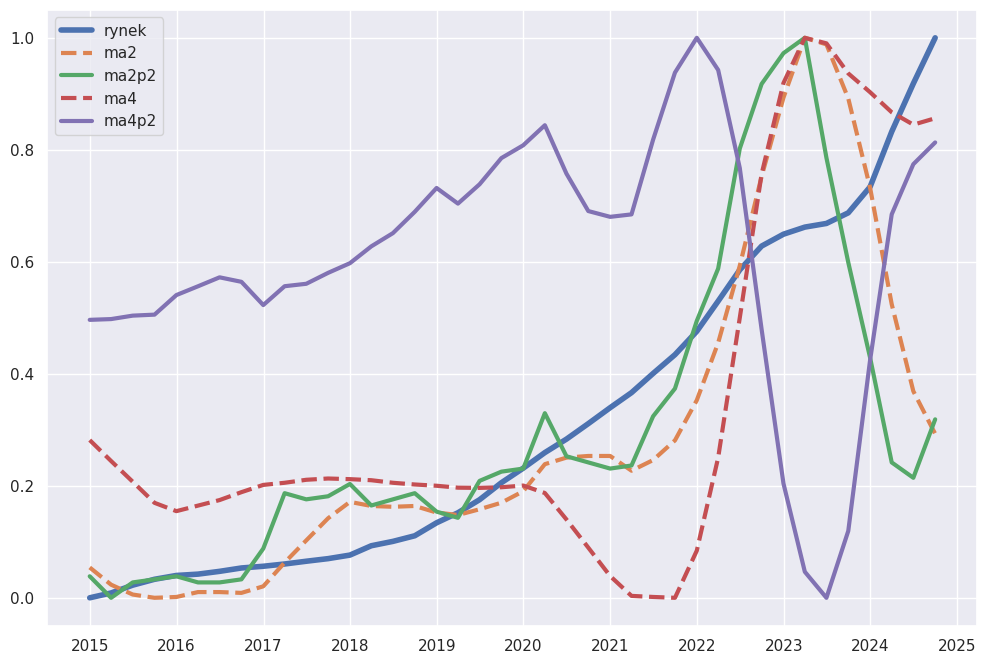

In [20]:
sndf = sklearn.preprocessing.MinMaxScaler().fit_transform(ndf)
fig = plt.figure(figsize=(12,8))
ax = fig.gca()
for ind, col in enumerate(ndf.columns):

    ax.plot(ndf.index, ssdf[:,ind], lw=(4 if col == "rynek" else 3), ls=("-" if ind%2==0 else "--"), label=col)
ax.legend()
fig.savefig(f"../images/ndf_ma_scaled.png")
plt.show()

<Axes: >

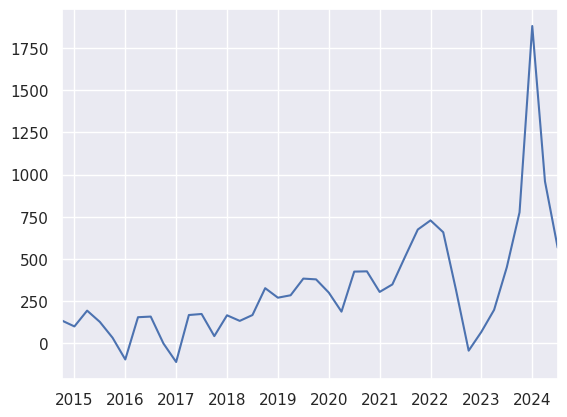

In [23]:
res = ndf["rynek"] - ndf["ma4"]
res = res.loc[~pd.isnull(res)]
res.plot()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

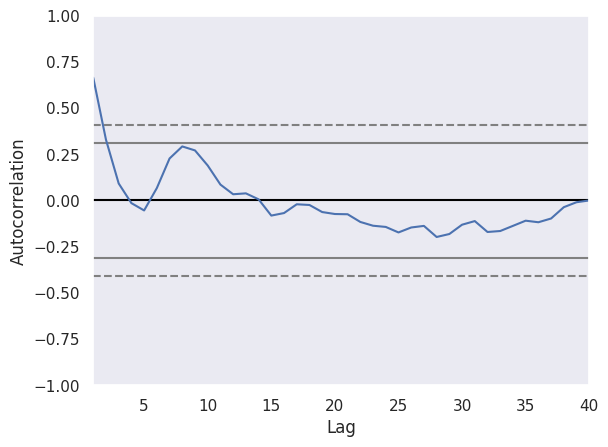

In [24]:
pd.plotting.autocorrelation_plot(res)